# MuJoCo results

### Init and setup libs

In [1]:
import json
import os
import logging
from typing import List, Tuple, Union, Optional

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

logging.basicConfig()
logger = logging.getLogger('ACERAC')
logger.setLevel(logging.DEBUG)

sns.set_theme()
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

### Get paths and experiment's names function

In [2]:
def get_results_experiment_location(prefix: str, results_dir: str) -> List[Tuple[str, str]]:
    """
    Retrun location of the experiment with its name extracted from parameters file.

    Args:
        prefix (str): Prefix of the file. Can be either prefix or whole file name if only one result needs to be considered.
        results_dir (str): Directory where data should be looked for.
    
    Returns:
        (List[Tuple[str, str]]): List of tuples where first element is experiment name and second path to the results file. 
    """
    directory = os.fsencode(results_dir)

    result: List[Tuple[str, str]] = []
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if not filename.startswith(prefix) or not os.path.isdir(os.path.join(results_dir, filename)):
            continue
        logger.info(f'Found directory: {filename}')
        parameters_file = os.path.join(results_dir, filename, 'parameters.json')
        if not os.path.isfile(parameters_file):
            logger.error(f'Not found parameters.json file in {filename}')
        results_file = os.path.join(results_dir, filename, 'results.csv')
        if not os.path.isfile(results_file):
            logger.error(f'Not found results.csv file in {filename}')
        
        with open(parameters_file) as f:
            params = json.load(f)
            experiment_name = f"g{params['gamma']}-a{params['alpha']}-s{params['std']}".replace('.', '_')

        result.append((experiment_name, results_file))
        
    return result

### Plot results function

In [3]:
def plot_results(
    prefix: str,
    title: str,
    filename: str,
    results_dir: str = '../results/data/acer_mujoco_results',
    label_col_name: str = 'label',
    figsize: Tuple[int, int ]=(14, 7),
) -> None:
    results = get_results_experiment_location(prefix=prefix, results_dir=results_dir)

    dfs: List[pd.DataFrame] = []
    for experiment_name, result in results:
        df = pd.read_csv(result)
        if label_col_name in df.columns:
            logger.warning(f'Label column `{label_col_name}` already exists in {result}. Overriding!')
        df[label_col_name] = experiment_name
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)

    plt.figure(figsize=figsize)
    sns.lineplot(data=df, x="time_step", y="eval_return_mean", hue=label_col_name).set(title=title, xlabel='Milion timesteps', ylabel='Average return')
    plt.savefig(filename, bbox_inches='tight') 

### Plot HalfCheetah-v2

INFO:ACERAC:Found directory: HalfCheetah-v2_acerac_20220113-100420
INFO:ACERAC:Found directory: HalfCheetah-v2_acerac_20220113-100354
INFO:ACERAC:Found directory: HalfCheetah-v2_acerac_20220113-100114
INFO:ACERAC:Found directory: HalfCheetah-v2_acerac_20220113-100604
INFO:ACERAC:Found directory: HalfCheetah-v2_acerac_20220113-100524


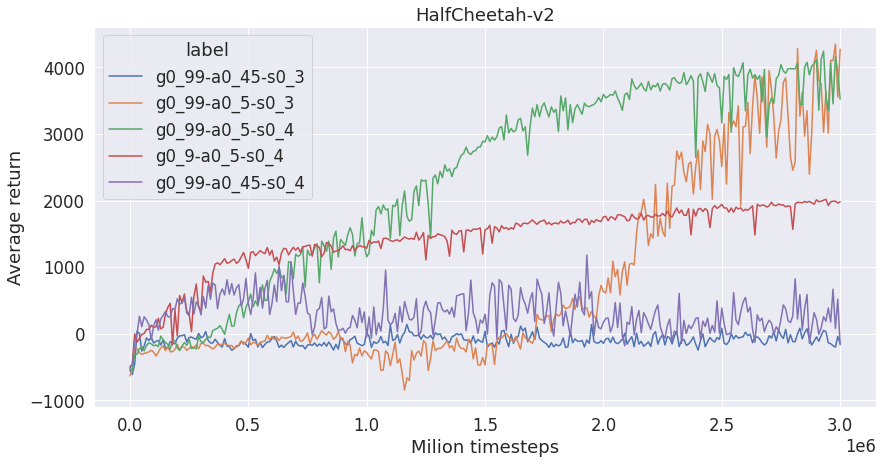

In [4]:
plot_results(prefix='HalfCheetah-v2', title='HalfCheetah-v2', filename='../results/mujoco_fig/HalfCheetah-v2.png')

### Plot Ant-v2

INFO:ACERAC:Found directory: Ant-v2_acerac_20220115-024854


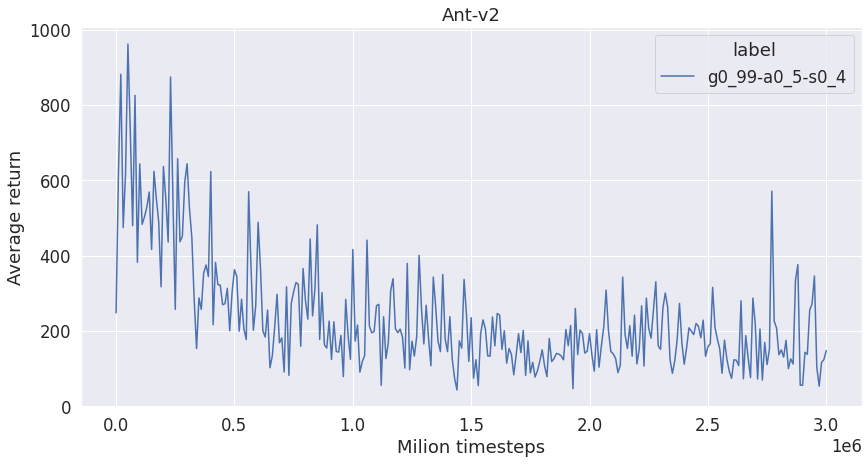

In [5]:
plot_results(prefix='Ant-v2', title='Ant-v2', filename='../results/mujoco_fig/Ant-v2.png')

### Plot Hopper-v2

INFO:ACERAC:Found directory: Hopper-v2_acerac_20220115-025035


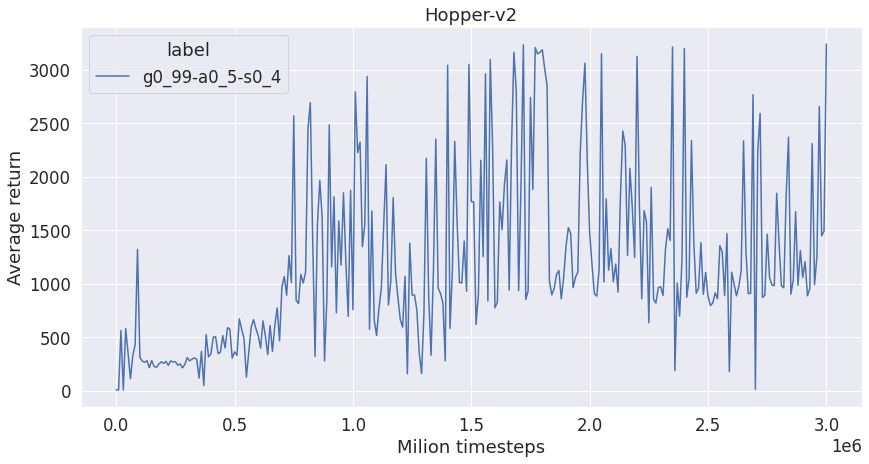

In [6]:
plot_results(prefix='Hopper-v2', title='Hopper-v2', filename='../results/mujoco_fig/Hopper-v2.png')

### Plot HumanoidStandup-v2

INFO:ACERAC:Found directory: HumanoidStandup-v2_acerac_20220115-024751


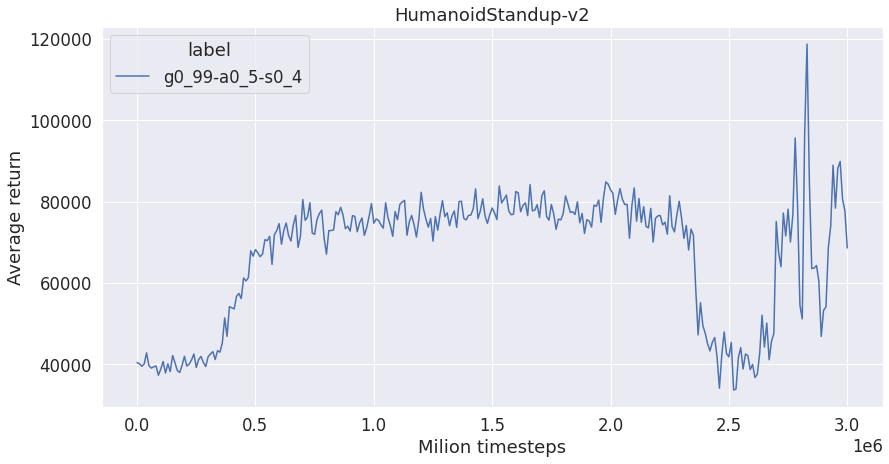

In [7]:
plot_results(prefix='HumanoidStandup-v2', title='HumanoidStandup-v2', filename='../results/mujoco_fig/HumanoidStandup-v2.png')

### Plot Walker2d-v2

INFO:ACERAC:Found directory: Walker2d-v2_acerac_20220115-025313


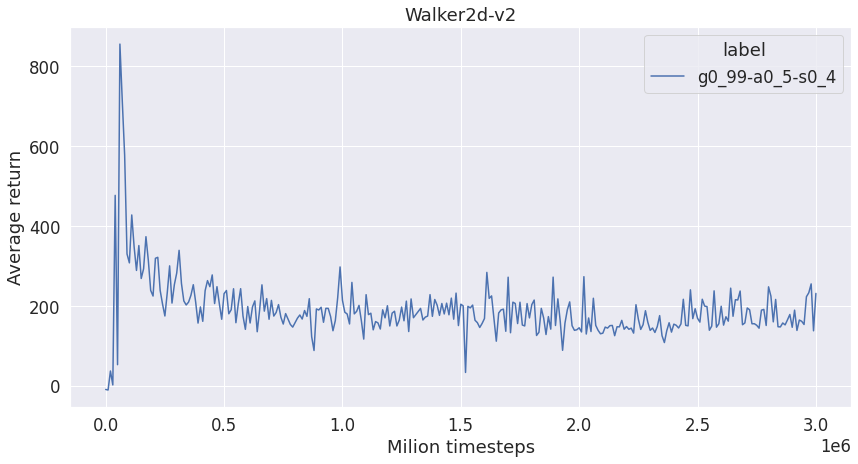

In [8]:
plot_results(prefix='Walker2d-v2', title='Walker2d-v2', filename='../results/mujoco_fig/Walker2d-v2.png')